<a href="https://colab.research.google.com/github/ManishShah120/Py4DSci/blob/master/Predicting_Price_of_Pre_Owned_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Problem Statement:**

## Storm Motors is an e-commerce company who act as mediators between parties interested in selling and buying pre-owned cars.

## For the year 2015-2016, they have recorded data about the seller and car including:-
*   Specification details
*   Condition of car
*   Seller details
*   Registration details
*   Web advertisement details
*   Make and model information
*   Price

## Storm Motors wishes to **develop an algorithm to predict the price of the cars based on various attributes associated with the car.**

# **Framework:**
## Solution Conceptualization
*   Identify if data is clean
*   Look for missing values
*   Identify variables influencing price and look for relationships among  variables
> *    Correlation,box plots, scatter plots etc
*   Identify outliers
> *    Central tendency measures, dispersion measures, box plots, histograms etc.
*   Identify if categories with merge frequesncies can be combined.
*   Filter data based on logical checks
>   *    Price, year of registration, power
*   Reduced number of data
*   Method identification
>   *    Linear regression
>   *    Random forest

In [0]:
import pandas as pd #For reading files as dataframe from csv format
import numpy as np #For performing various numerical operations
import seaborn as sns #For visulaization 

In [2]:
from google.colab import drive # For reading the files from google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Setting dimensions for plot

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # set is function from seabormn package
## The above line Of Code(LOC) will set the dimensions for all our plots

## Reading the CSV file

In [0]:
cars_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cars_sampled.csv')

In [5]:
cars_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


### Creating copy

In [0]:
cars = cars_data.copy() # This is known as deep copy i.e., any changes  made in the cars will not replect in cars_data

### Structure of the dataset

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

#### We see that there are 6 columns which are of int64 datatype and 13 columns which are of object datatype

# Summarizing data

In [8]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


#### How to get rid of the scientific notation?

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Lambda function

In [10]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


#### Not all the columns are visible so??

In [11]:
# To display maximum set of columns
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

#### Lets **DROP** Unwanted Columns

In [0]:
# We are going to drop all these columns present in the list "col"
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 14 columns):
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dtypes: int64(5), object(9)
memory usage: 5.3+ MB


# Lets remove the duplicate records and keeping the first record and deleting the rest of duplicate records of it

In [0]:
cars.drop_duplicates(keep='first',inplace=True)

In [16]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
seller                 49531 non-null object
offerType              49531 non-null object
price                  49531 non-null int64
abtest                 49531 non-null object
vehicleType            44379 non-null object
yearOfRegistration     49531 non-null int64
gearbox                46766 non-null object
powerPS                49531 non-null int64
model                  46801 non-null object
kilometer              49531 non-null int64
monthOfRegistration    49531 non-null int64
fuelType               45064 non-null object
brand                  49531 non-null object
notRepairedDamage      39891 non-null object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


# **Data Cleaning**

In [17]:
# Lets compute the number of missing values in each columns
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

#### The numbers we see other than zeroes are the number of missing datas

### Lets take **Variable** :- **yearOfRegistration** first
#### Sorting that based on the years

In [0]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()

In [19]:
yearwise_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

#### We can see that the yearwisecount is also having datas from future which is no use so lets clean that out

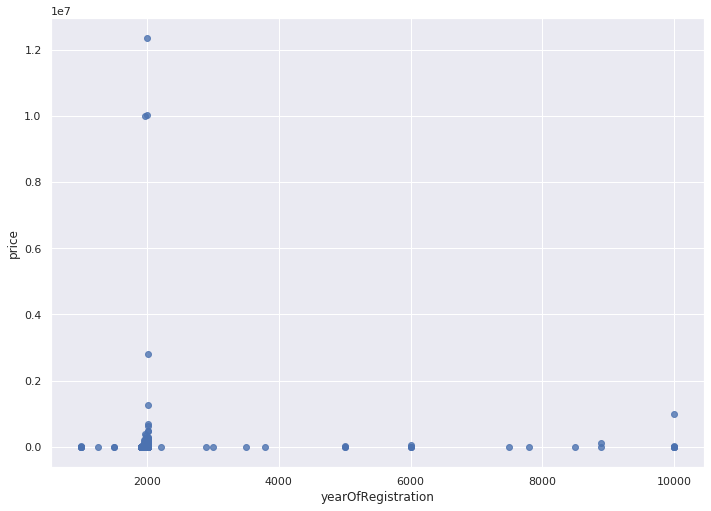

In [20]:
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True, fit_reg=False, data=cars)

##### We can see that we cannot find any insight from this plot
##### Working range-1950 and 2018

# **Variable**:- price

# We do dot value_counts() and then we sort based on the ascending order of the price

In [0]:
price_counts=cars['price'].value_counts().sort_index()

In [22]:
price_counts

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

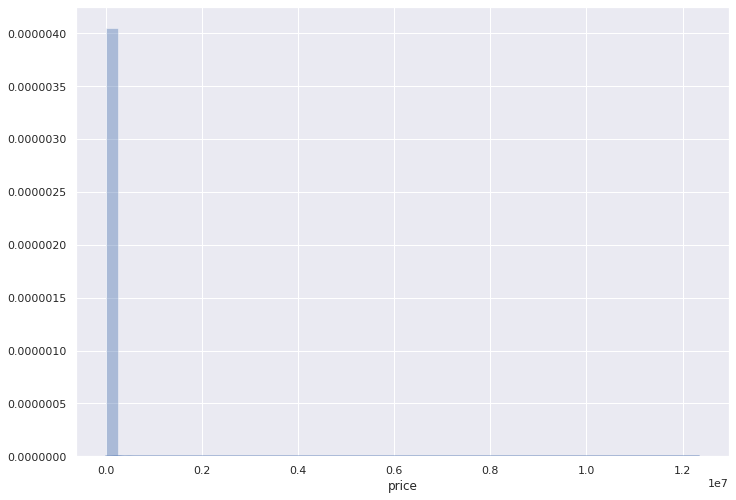

In [23]:
sns.distplot(cars['price'])

In [24]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

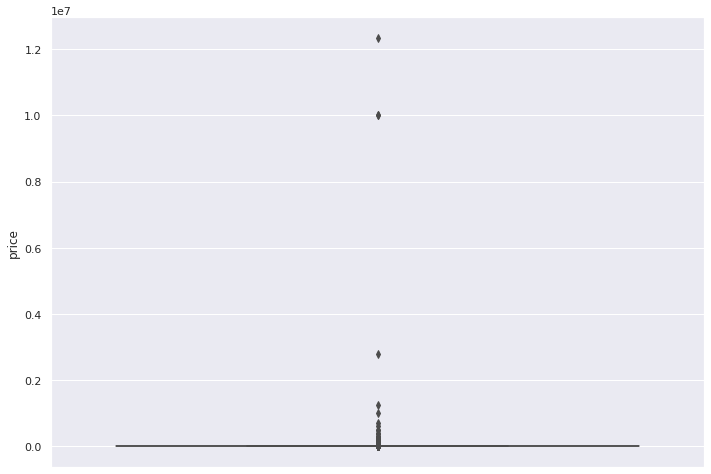

In [25]:
sns.boxplot(y=cars['price'])

# Lets check how many cars are priced greater than 150000

In [26]:
sum(cars['price'] > 150000)

34

In [27]:
# less than 100
sum(cars['price'] < 100)

1748

##### Working range 100 and 150000

# varible:- **powerPS**

In [0]:
power_count = cars['powerPS'].value_counts().sort_index()

In [29]:
power_count

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

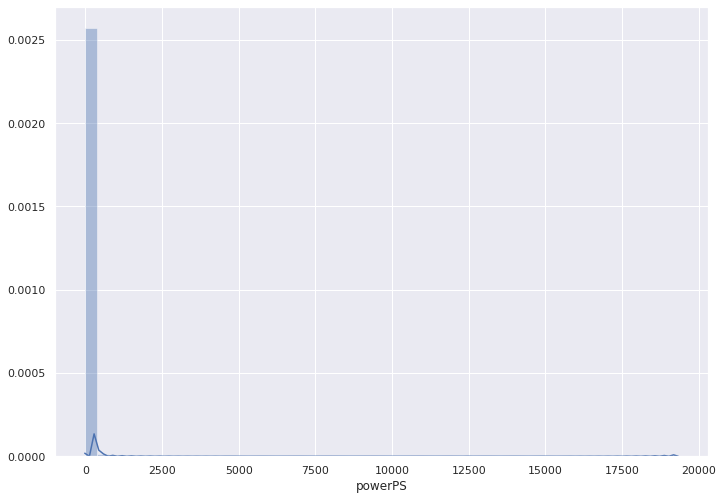

In [30]:
sns.distplot(cars['powerPS']) # Distplot

In [31]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

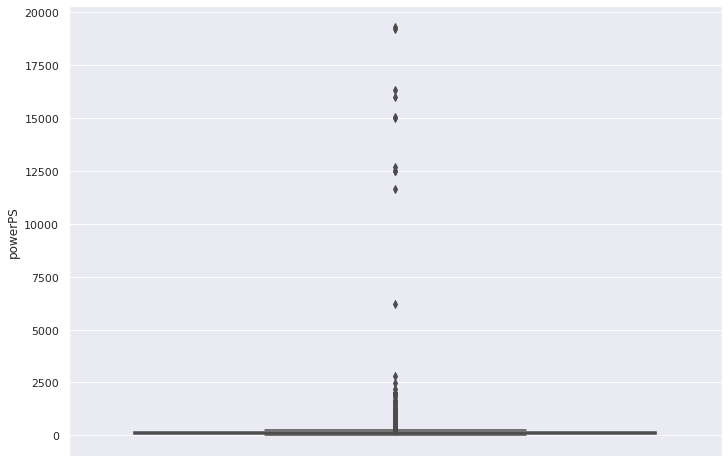

In [32]:
sns.boxplot(y=cars['powerPS'])

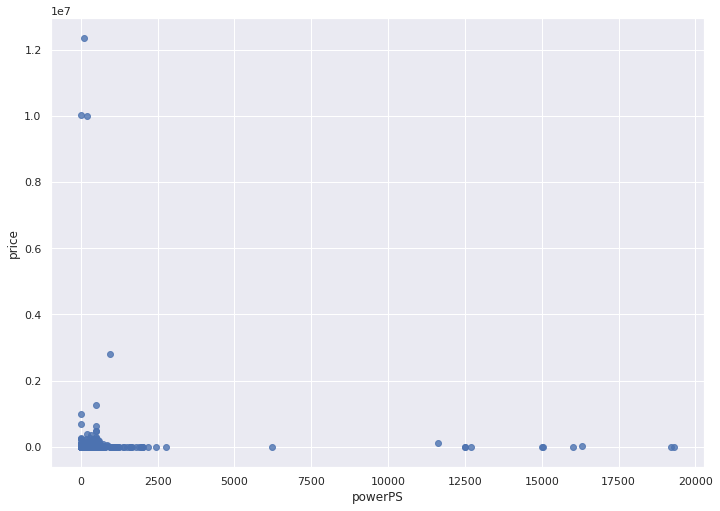

In [33]:
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)

In [34]:
sum(cars['powerPS'] > 500)

115

In [35]:
sum(cars['powerPS'] < 10)

5565

##### Working range 10 and 500

# **Cleaning the Data**

### Working Range's of Data

In [0]:
cars = cars[
            (cars.yearOfRegistration <=2018) & (cars.yearOfRegistration >= 1950) &
            (cars.price >= 100) & (cars.price <=150000) &
            (cars.powerPS >= 10) & (cars.powerPS <= 500)
            ]

###### 6700 records are dropped

### Also with year of registration it's hard to find the age of the car
### So we are going to substract the year of registration from 2018 and add the month of registration {For the month of registration we are going to divide it by 12 which gives us months in decimal and}
### and add another variable age to the dataset

# Further to simplyfy wariable reduction
# combining yearOfRegistration and monthOfRegistration

In [37]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no


In [0]:
cars['monthOfRegistration'] /= 12

In [39]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no


# Creating new variable Age by adding yearOfRegistration and monthOfRegistration

In [0]:
cars['Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']

In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 15 columns):
seller                 42772 non-null object
offerType              42772 non-null object
price                  42772 non-null int64
abtest                 42772 non-null object
vehicleType            39896 non-null object
yearOfRegistration     42772 non-null int64
gearbox                41978 non-null object
powerPS                42772 non-null int64
model                  41089 non-null object
kilometer              42772 non-null int64
monthOfRegistration    42772 non-null float64
fuelType               40175 non-null object
brand                  42772 non-null object
notRepairedDamage      36495 non-null object
Age                    42772 non-null float64
dtypes: float64(2), int64(4), object(9)
memory usage: 5.2+ MB


In [42]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN,15.917
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,10.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no,14.667
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no,20.750
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no,19.667
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no,17.250


In [0]:
# Lets round the age variable to two decimal palces
cars['Age'] = round(cars['Age'],2)

In [44]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no,14.670
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no,20.750
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no,19.670
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no,17.250


In [45]:
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

# lets drop yearOfRegistration and monthOfRegistration

In [0]:
cars = cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

In [47]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 13 columns):
seller               42772 non-null object
offerType            42772 non-null object
price                42772 non-null int64
abtest               42772 non-null object
vehicleType          39896 non-null object
gearbox              41978 non-null object
powerPS              42772 non-null int64
model                41089 non-null object
kilometer            42772 non-null int64
fuelType             40175 non-null object
brand                42772 non-null object
notRepairedDamage    36495 non-null object
Age                  42772 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 4.6+ MB


# **Visualization of Parameters:-**

## **Age:-**

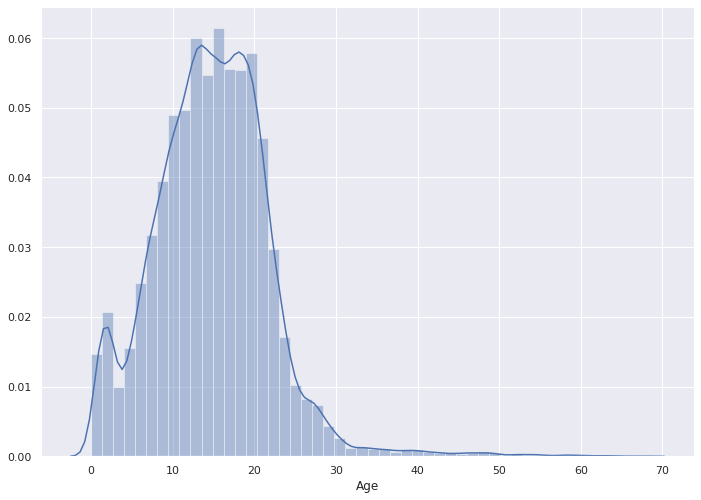

In [48]:
sns.distplot(cars['Age'])

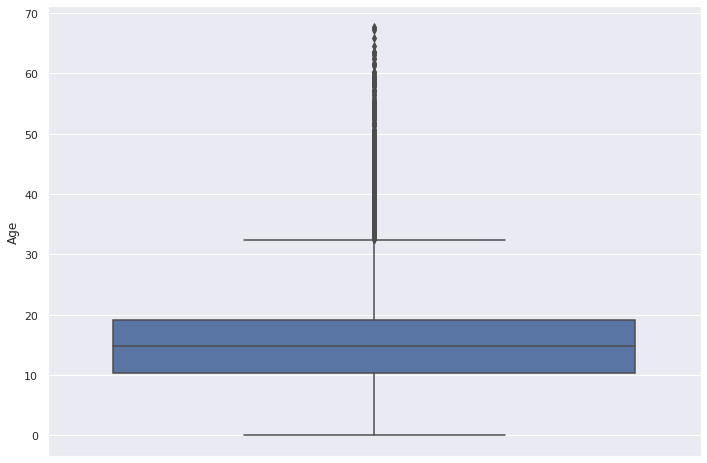

In [49]:
sns.boxplot(y=cars['Age'])

## **Price:-**

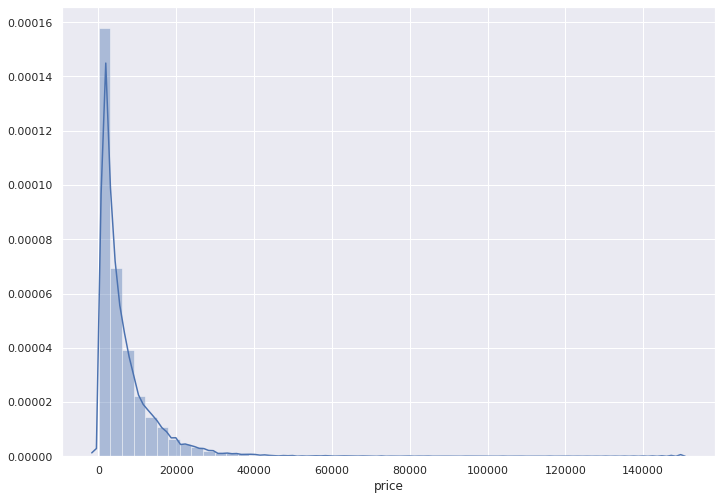

In [50]:
sns.distplot(cars['price'])

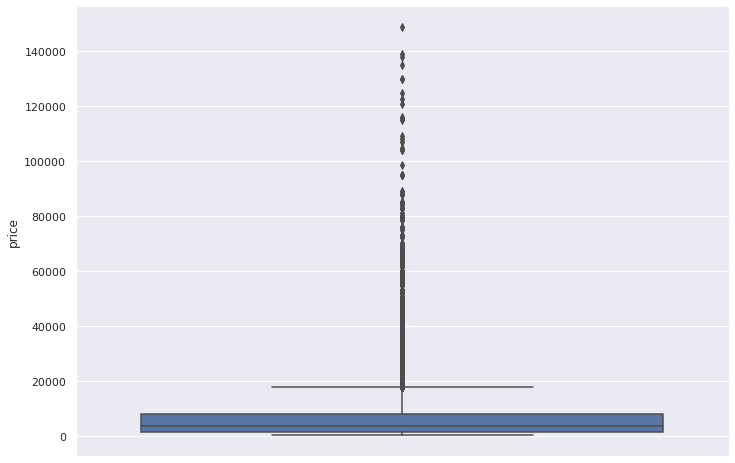

In [51]:
sns.boxplot(y=cars['price'])

## **powerPS:-**

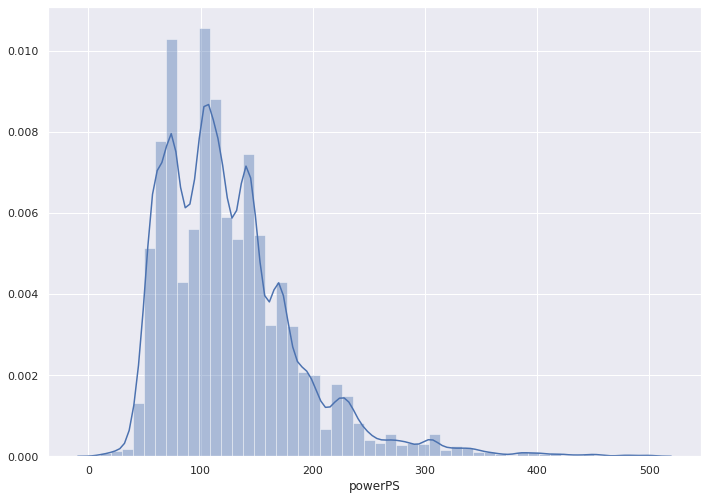

In [52]:
sns.distplot(cars['powerPS'])

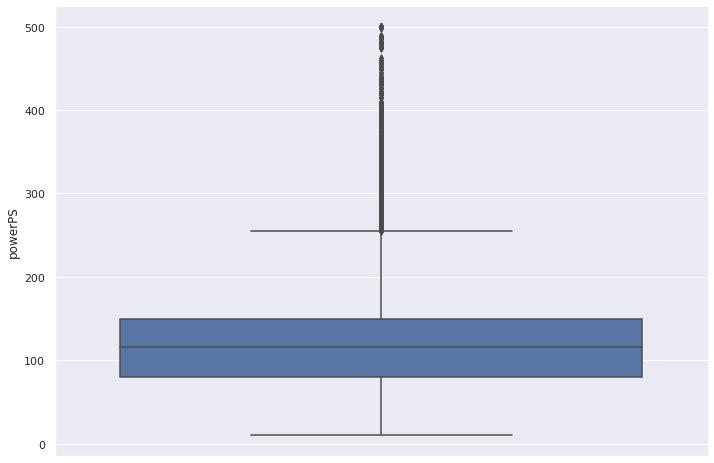

In [53]:
sns.boxplot(y=cars['powerPS'])

In [0]:
#Time Stamp:- 08:08